In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import datasets, layers, models, losses

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [21]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

In [25]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train.shape

TensorShape([60000, 32, 32])

In [18]:
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train.shape

TensorShape([50000, 32, 32, 1, 3])

In [26]:
x_val = x_train[-2000:,:,:,:] 
y_val = y_train[-2000:] 
x_train = x_train[:-2000,:,:,:] 
y_train = y_train[:-2000]

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=x_train.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(16, 5, activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_4 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 activation_4 (Activation)   (None, 14, 14, 6)         0         
                                                                 
 conv2d_8 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 activation_5 (Activation)   (None, 5, 5, 16)         

In [28]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
  8/750 [..............................] - ETA: 5s - loss: 2.4313 - accuracy: 0.1270  

2022-09-06 19:23:07.884136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


750/750 [==============================] - 6s 7ms/step - loss: 2.1354 - accuracy: 0.1838 - val_loss: 1.9954 - val_accuracy: 0.2520
Epoch 2/40
  1/750 [..............................] - ETA: 5s - loss: 1.9266 - accuracy: 0.3125

2022-09-06 19:23:13.169214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


750/750 [==============================] - 5s 7ms/step - loss: 1.9300 - accuracy: 0.2711 - val_loss: 1.8540 - val_accuracy: 0.3010
Epoch 3/40
750/750 [==============================] - 5s 7ms/step - loss: 1.7885 - accuracy: 0.3324 - val_loss: 1.7590 - val_accuracy: 0.3435
Epoch 4/40
750/750 [==============================] - 5s 7ms/step - loss: 1.6955 - accuracy: 0.3734 - val_loss: 1.6444 - val_accuracy: 0.3950
Epoch 5/40
750/750 [==============================] - 5s 7ms/step - loss: 1.6394 - accuracy: 0.3938 - val_loss: 1.6338 - val_accuracy: 0.3905
Epoch 6/40
750/750 [==============================] - 5s 7ms/step - loss: 1.6006 - accuracy: 0.4061 - val_loss: 1.6148 - val_accuracy: 0.3930
Epoch 7/40
750/750 [==============================] - 5s 7ms/step - loss: 1.5677 - accuracy: 0.4197 - val_loss: 1.5704 - val_accuracy: 0.4085
Epoch 8/40
750/750 [==============================] - 5s 7ms/step - loss: 1.5475 - accuracy: 0.4289 - val_loss: 1.5425 - val_accuracy: 0.4265
Epoch 9/40
750/75

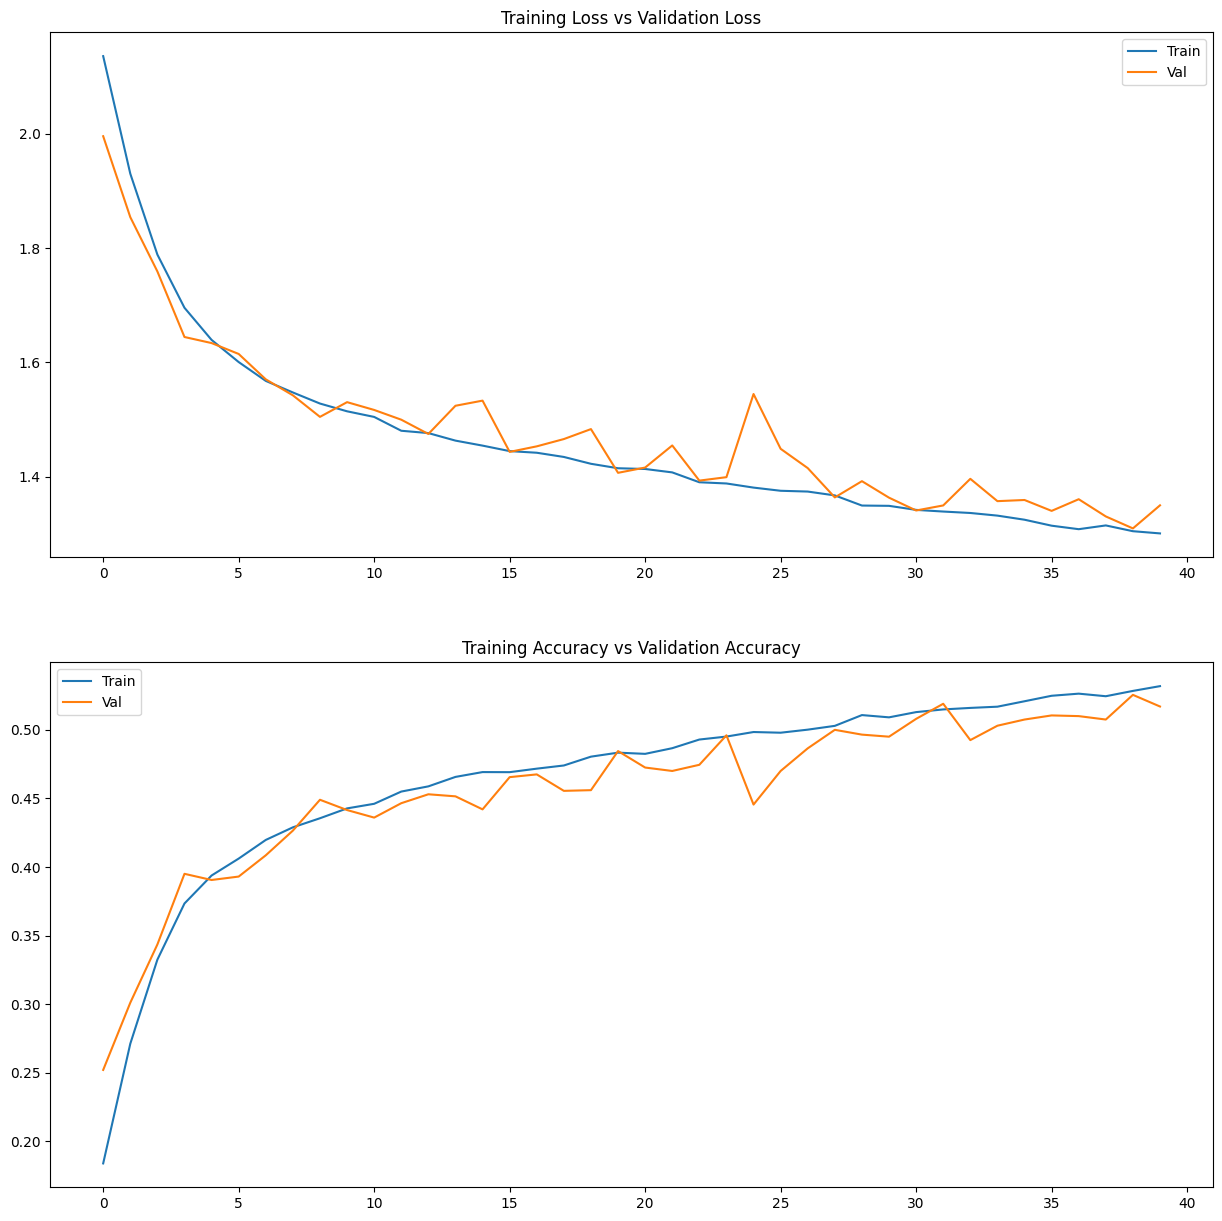

In [29]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))  
axs[0].plot(history.history['loss']) 
axs[0].plot(history.history['val_loss']) 
axs[0].title.set_text('Training Loss vs Validation Loss') 
axs[0].legend(['Train', 'Val'])  
axs[1].plot(history.history['accuracy']) 
axs[1].plot(history.history['val_accuracy']) 
axs[1].title.set_text('Training Accuracy vs Validation Accuracy') 
axs[1].legend(['Train', 'Val'])

In [30]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 1.3558 - accuracy: 0.5087


[1.3557875156402588, 0.5087000131607056]